In [2]:
import SCProcess as SCP

In [1]:
import scanpy as sc
import harmonypy as hm
import pandas as pd
import anndata as ad
import numpy as np
import scrublet as scr
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

random_state = 23

In [2]:
Lyko = sc.read("Anndata/GSE218170.h5ad")
Ji = sc.read("Anndata/GSE144236.h5ad")
Yost = sc.read("Anndata/GSE123813.h5ad")
Zou = sc.read("Anndata/GSE193304.h5ad")

files = [Lyko, Ji, Yost, Zou]

adata = sc.concat(files, join="outer", label="Dataset", keys=["Lyko", "Ji", "Yost", "Zou"])

#Var names includes 'Patient"? for some reason so renaming obs column
adata.obs.rename(columns={"Patient": "Patient_ID"}, inplace=True)

In [4]:
adata

AnnData object with n_obs × n_vars = 345052 × 46329
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'batch', 'Condition', 'Patient_ID', 'level1_celltype', 'level2_celltype', 'level3_celltype', 'treatment', 'cluster', 'UMAP1', 'UMAP2', 'Dataset'
    layers: 'counts'

In [7]:
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=40, random_state=7)
sc.tl.umap(adata, random_state=7, save="_unintegrated_umap.png")

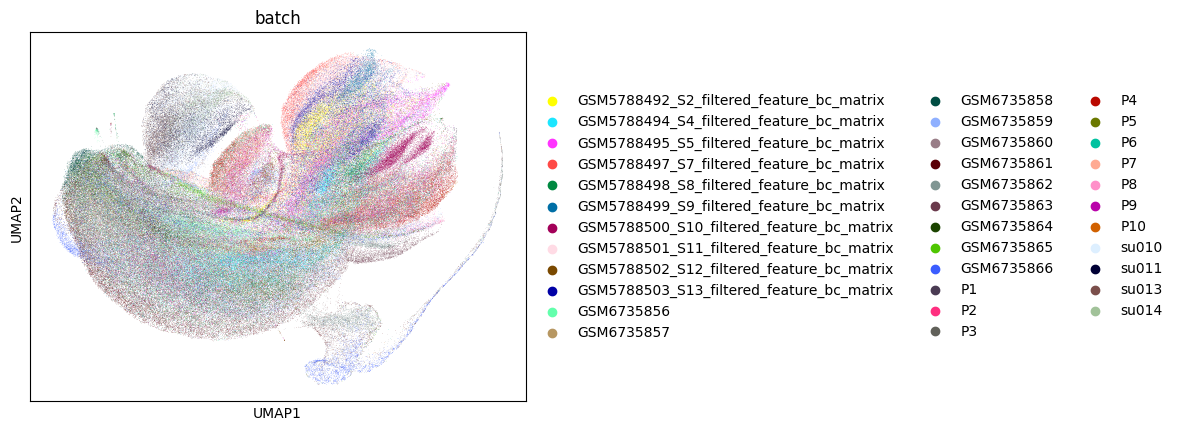

In [8]:
sc.pl.umap(adata, color='batch')

       log1p_n_genes_by_counts  log1p_total_counts  pct_counts_mt  \
count            345052.000000       345052.000000  345052.000000   
mean                  7.339252            8.453495       5.389543   
std                   0.783252            1.146103       8.929493   
min                   3.610918            5.860786       0.000000   
25%                   6.763885            7.584265       1.658768   
50%                   7.432484            8.466742       3.223093   
75%                   7.969012            9.359536       6.061414   
max                   9.264544           12.394977      98.391852   

       pct_counts_ribo  
count    345052.000000  
mean         23.420219  
std           9.268096  
min           0.166556  
25%          17.025235  
50%          23.162006  
75%          29.896907  
max          75.558795  
       n_cells_by_counts   mean_counts  log1p_mean_counts  \
count       46329.000000  46329.000000       46329.000000   
mean        15011.008526      0

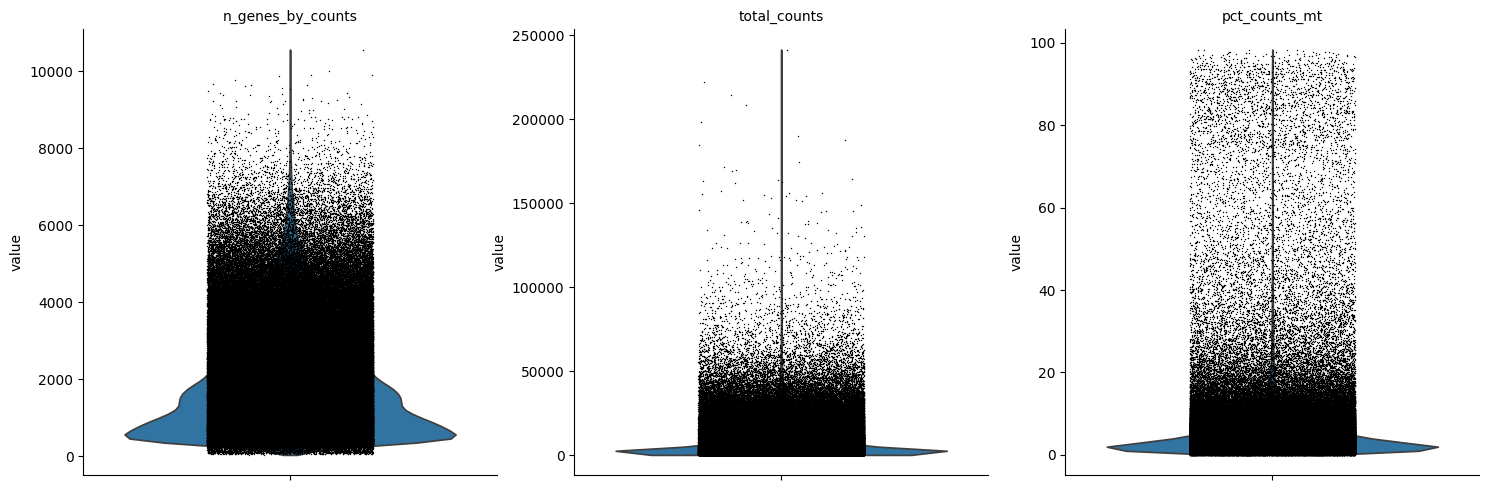

Total number of cells: 345052
Number of cells after mt filter: 312987
Number of cells after gene filter: 309820
Total number of genes: 46329
After mt genes removal:  46316
After ribo genes removal:  46209
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...


In [ ]:
SCP.Runall(adata)

In [ ]:
#adata.write_h5ad("/data/BCI-SingleCell/SCC_Atlas/Sam_Nicholls/Combined_adata_object_V3.h5ad") 

In [ ]:
adata = sc.read("/data/BCI-SingleCell/SCC_Atlas/Sam_Nicholls/Combined_adata_object_V3.h5ad")

In [ ]:
adata